In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

plt.style.use("fivethirtyeight")
# sns.set_palette("muted")
%matplotlib inline

### Importing ICO composite index prices

In [3]:
raw_ICO_index_data = pd.read_csv("../datasets/capstone/unused data/us_monthlycommoditypriceaverages_03927558512071.csv", encoding = "ISO-8859-1", header = 1)

In [12]:
ICO_index_data = raw_ICO_index_data.copy()
ICO_index_data = ICO_index_data.drop(labels = 0).T
ICO_index_data.rename(columns = ICO_index_data.loc["PERIOD", :], inplace = True)
ICO_index_data = ICO_index_data.drop(labels = ["PERIOD"])
ICO_index_data = ICO_index_data.apply(pd.to_numeric, errors = 'coerce')
ICO_index_data["time"] = pd.to_datetime(ICO_index_data.index.values, format = "%b%Y")
ICO_index_data.index = ICO_index_data["time"].values

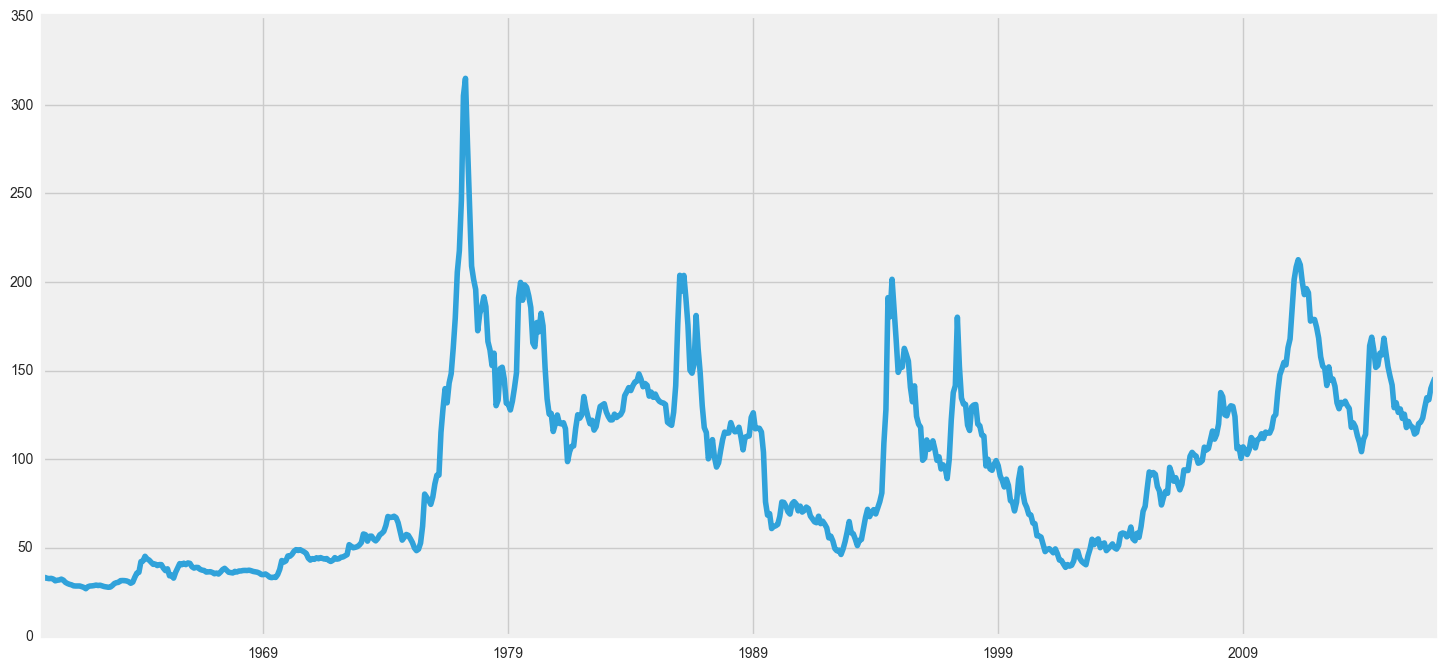

In [18]:
# ICO_index_data[["Coffee, ICO composite indicator price 1976 (¢/lb.)"]].to_csv("../datasets/ICO composite indicator index since 1960.csv")
ICO_index_data["Coffee, ICO composite indicator price 1976 (¢/lb.)"].plot(figsize=(16,8))
sns.plt.show()

In [5]:
ICO_index_since_1989_data = ICO_index_data[ICO_index_data["time"] > datetime.date(1988,12,31)]
ICO_index_since_1989_data.index = ICO_index_since_1989_data["time"].values
ICO_index_since_1989_data.drop("time", axis = 1, inplace = True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [6]:
### Define target column

Make a column based on daily changes of the ICO composite index. Use a threshold (e.g., changes greater than ±10%); base this threshold on volatility or standard deviation.

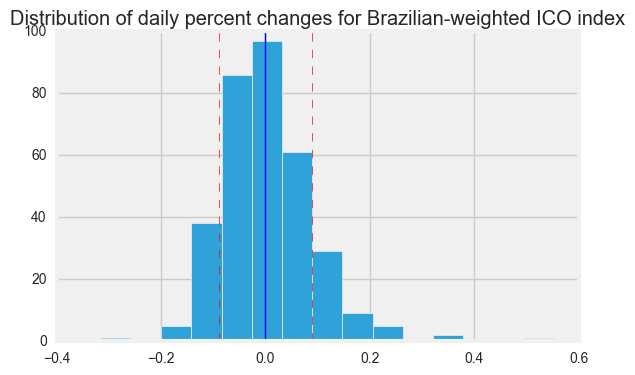

In [7]:
std_dev = (ICO_index_since_1989_data["Coffee*, Brazilian and other natural Arabicas, ex-dock USA (¢/lb.)"].pct_change().std())

ICO_since_1989_pct_change = (ICO_index_since_1989_data["Coffee*, Brazilian and other natural Arabicas, ex-dock USA (¢/lb.)"].pct_change())
ICO_since_1989_pct_change.hist(bins = 15)

plt.axvline(x = -std_dev, c = 'r', linestyle = 'dashed', linewidth = 0.5)
plt.axvline(x = std_dev, c = 'r', linestyle = 'dashed', linewidth = 0.5)
plt.axvline(x = 0, linewidth = 1)
plt.title("Distribution of daily percent changes for Brazilian-weighted ICO index")
plt.show()

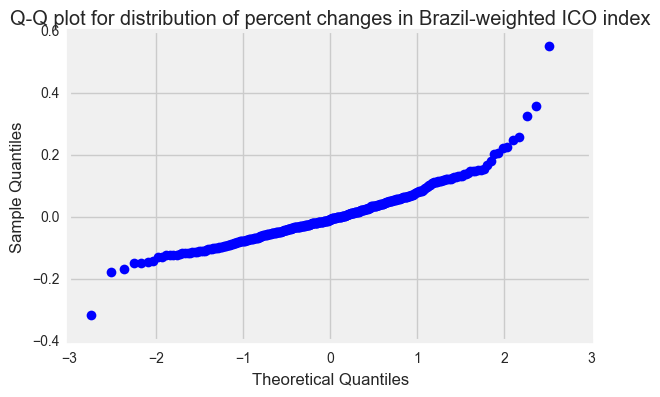

In [8]:
import statsmodels.api as sm

sm.qqplot(ICO_since_1989_pct_change)
plt.title("Q-Q plot for distribution of percent changes in Brazil-weighted ICO index")
plt.show()

In [15]:
ICO_greater_than_5_pct_change = ICO_since_1989_pct_change.abs() > 0.05
print("Percent of days with greater that 1% change: {}%".format(100 * round(ICO_greater_than_5_pct_change.mean(), 3)))
ICO_index_since_1989_data.loc["Greater that 5% change"] = ICO_greater_than_5_pct_change.map({True: 1, False: 0})

Percent of days with greater that 1% change: 51.6%


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [17]:
target_dataframe = ICO_index_since_1989_data[["Coffee*, Brazilian and other natural Arabicas, ex-dock USA (¢/lb.)", "Greater that 5% change"]]

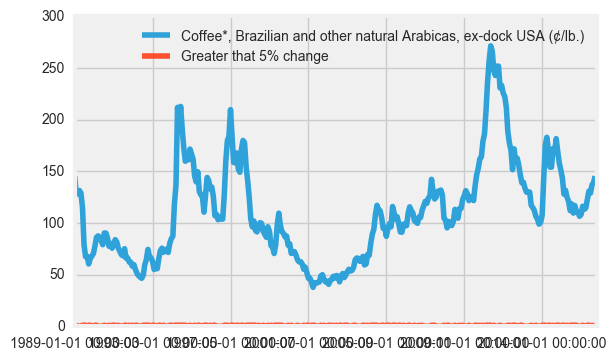

In [21]:
target_dataframe.plot()